# Data Exploration

## 2/02/2021
### By Kurt Semm

## Before we Talk about Data...


### Deductive versus Inductive Reasoning
* What does it mean?
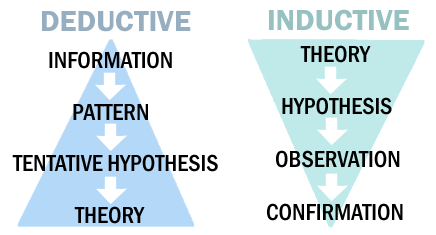
* Role of empirics 

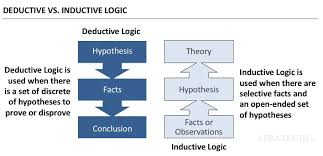


* Methodenstreit 
    * Millberg
* Why don't we have the same debates today?







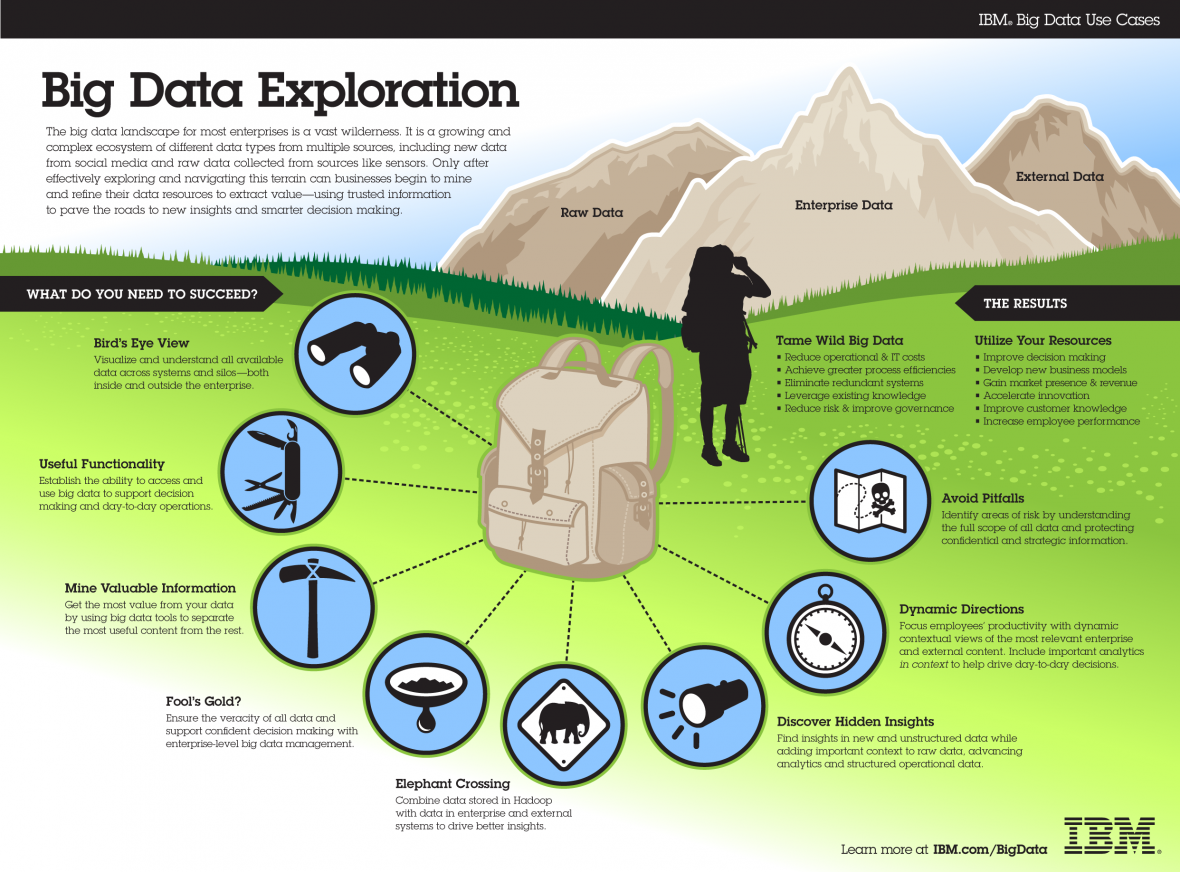

## What Do We Know?

### Epistemology 
* In what ways can we determine what is true? 
    * Popper and [Faslification](https://plato.stanford.edu/entries/popper/) 
    * [Lakatos](https://plato.stanford.edu/entries/lakatos/) 
    * Milton Friedman's [Pool Player](http://www.rweconomics.com/BPA.htm)
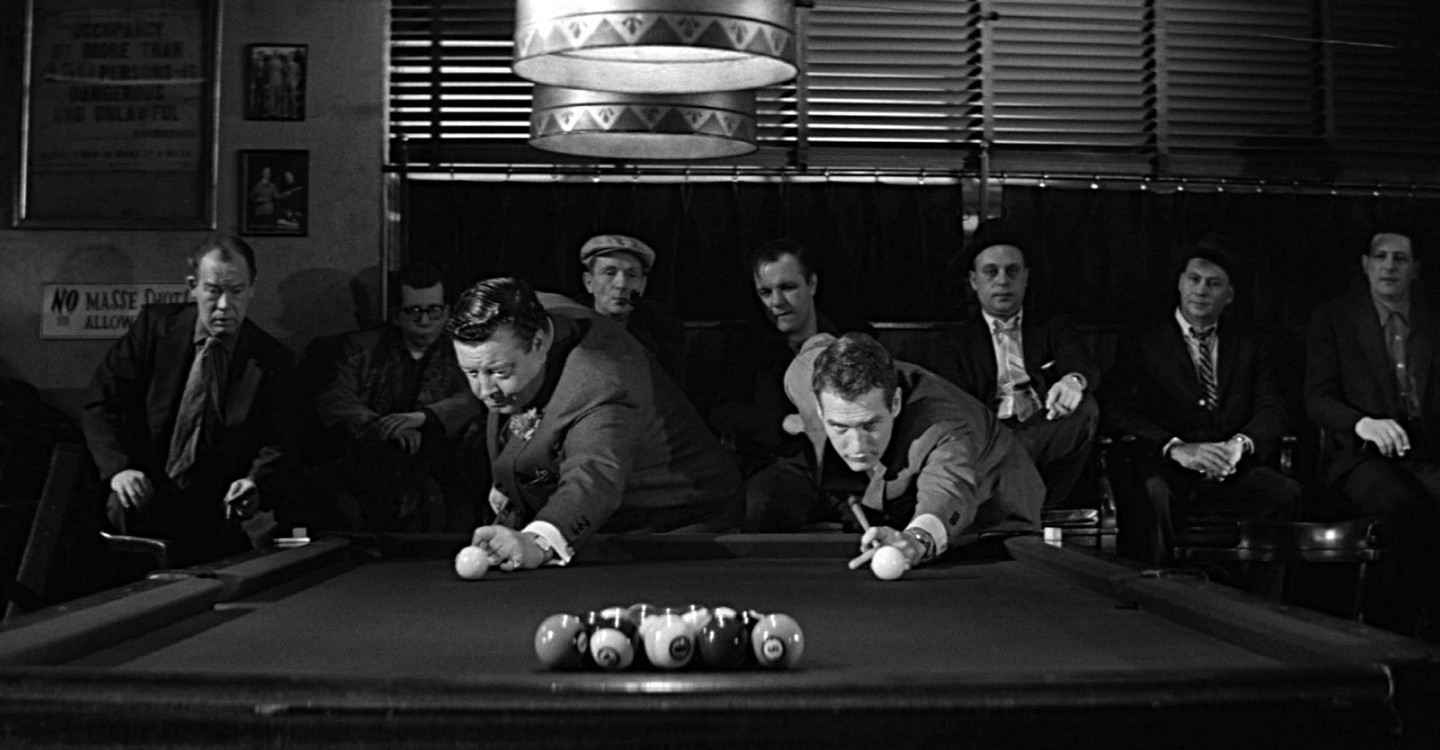

### Richard Rorty 
* American Philsopher [(1931-2007)](https://plato.stanford.edu/entries/rorty/)
* American Post Keynesians originally adopted this approach. 

## A priori 
* a prioi refers to knowledge determined by or gained through logic. 
* Closed Macro models, DSGE or PK models.


## A posteriori
* a posteriori refers to knowledge determine by or gained through empirical evidence. 
* Marx raises this point in Capital.

## Ex Ante
- Is primarily a forecast, or when an individual uses all the current information to predict what will happen. 

## Ex Post
- The results after the event, and uses new information that was not available the first time. 

## Fundamental Uncertainty

* Knowledge and rational calculation for PK is not a gut feeling, and it is not "rational," in the Lucas sense, but "rational" in the non-economic sense. Furthermore, fundamental uncertainty on the treatment of expectations requires us to pair expectations with realization. Expectations, which are the present knowledge of what we might think will happen in the future, is only useful or helpful if we can compare it to the realization, which is the knowledge of what actually happened. What is key is that expectations represent the maximum knowledge an economic agent (firm, worker, investor) has when it decides uncertainty, or **ex ante**. Then the agent compares their expectations to the realization of their decision **ex post**. For example, say a firm, using a fundamental uncertainty approach to knowledge, decides in the present period that they want to sell 100 items of X good over the next 3 months. Here we can say the firm expects to sell 100 items of X. Then, after the 3 months goes by, the firm realizes that they, in fact, sold 110 items of good X. Using PK nomenclature, we would say the firms' realized sales overshot its expectations by 10 items of good X. Then, by comparing their expectations to the realization (+10 sales of item X), the firm will set new expectations of how many X items to sell over the next 3 months. Meaning, the firm will set new expectations, and the process repeats itself. The above logic of the firm's scenario can be expanded to analyze all economist agents, all of whom have expectations of future events.



* Keynes and Paul Davidson

## Pip Install 
* pip install *name of library*

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as fplt
import matplotlib.dates as mpl_dates
from textable import TexTable
from tabulate import tabulate
from texttable import Texttable

In [5]:
df = yf.Ticker('aapl')
df

yfinance.Ticker object <AAPL>

In [7]:
df_hist = df.history(start='2020-08-01', end='2021-01-29')
df_hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [31]:
hsma40 = df_hist['High'].rolling(40).mean()
lsma40 = df_hist['Low'].rolling(40).mean()
ema15 = df_hist['Close'].ewm(span=15).mean()

In [ ]:
df.info

## How to get Multiple companies data

In [7]:
tickers_list = ['TSLA','F','TM','GM']
tickers_data = {}

In [8]:
for ticker in tickers_list:
    ticker_object = yf.Ticker(ticker)
    
    #We now need to put get the info() output from a dictionary to a dataframe
    output = pd.DataFrame.from_dict(ticker_object.info, orient='index')
    output.reset_index(inplace=True)
    output.columns={"Attribute","Recent"}
    
    #Now we add the (ticker, dataframe) to main dictionary
    tickers_data[ticker] = output
    
tickers_data

{'TSLA':                     Recent                                          Attribute
 0                      zip                                              94304
 1                   sector                                  Consumer Cyclical
 2        fullTimeEmployees                                              70757
 3      longBusinessSummary  Tesla, Inc. designs, develops, manufactures, l...
 4                     city                                          Palo Alto
 ..                     ...                                                ...
 119  sharesShortPriorMonth                                           60620873
 120               category                                               None
 121  fiveYearAverageReturn                                               None
 122     regularMarketPrice                                                795
 123               logo_url                https://logo.clearbit.com/tesla.com
 
 [124 rows x 2 columns],
 'F':            

## Now let's clean up the data.

In [9]:
tickers_clean = pd.concat(tickers_data)
tickers_clean = tickers_clean.reset_index()
del tickers_clean["level_1"]
tickers_clean.columns = ["Ticker", "Attribute", "Recent"] # update column names
tickers_clean

,Ticker,Attribute,Recent
0,TSLA,zip,94304
1,TSLA,sector,Consumer Cyclical
2,TSLA,fullTimeEmployees,70757
3,TSLA,longBusinessSummary,"Tesla, Inc. designs, develops, manufactures, l..."
4,TSLA,city,Palo Alto
...,...,...,...
489,GM,sharesShortPriorMonth,15685325
490,GM,category,None
491,GM,fiveYearAverageReturn,None
492,GM,regularMarketPrice,52.5


## Company Info


In [10]:
tickers_clean.columns

Index(['Ticker', 'Attribute', 'Recent'], dtype='object')

## Employment Data

In [11]:
employees = tickers_clean[tickers_clean["Attribute"]=="fullTimeEmployees"].reset_index
#del employees["index"] # clean up unnecessary column

print(employees)

<bound method DataFrame.reset_index of     Ticker          Attribute  Recent
2     TSLA  fullTimeEmployees   70757
126      F  fullTimeEmployees  186000
249     TM  fullTimeEmployees  367987
372     GM  fullTimeEmployees  155000>


In [25]:
employees.save_csv

AttributeError: 'function' object has no attribute 'save_csv'

ValueError: DataFrame constructor not properly called!

## Earnings - Quarterly 

## Shares Outstanding 

## Market Cap

# Beta

## Latex? 

In [ ]:
print(tickers_clean.to_latex(index=False))